# Lab 2: `keras` and Neural Networks

## Date:  Saturday, October 20th 2018

#### Authors: David Sondak and Pavlos Protopapas

In lab 1, we created our own neural network by writing some simple `python` functions.  We focused on a regression problem wherein we tried to learn a function.  We practiced using the logistic activation function in a network with multiple nodes, but a single hidden layer.  

Some of the key observations were:
* Increasing the number of nodes allows us to represent more complicated functions  
* The weights and biases have a very big impact on the solution
* Finding the "correct" weights and biases is really hard to do manually
* There must be a better method for determining the weights and biases automatically

We also didn't assess the effects of different activation functions or different network depths.

Today, we will repeat some of the analysis from last time, but in the lab we will use [`keras`](https://keras.io/).

## I. Architectures Encoding Functions

**Motivating Question:** What exact kind of mathematical/statistical object is encoded by a neural network?

**Exercise #1:** For a network with the following architecture (a single output and one hidden layer), write the closed form expression for the function $f$ represented by the network.

Assume that the activation function at the output node is the identity funciton. Use the following notation:
- let $\mathbf{x}\in \mathbb{R}^D$ be the input; let the components of $\mathbf{x}$ be indexed by $d$
- let $H$ be the total number of hidden nodes, indexed by $h$
- let $\phi_h$ be the activation function at the hidden node $h$
- let $\mathbf{u}_h \mathbb{R}^D$ be the weights connecting the input to the $h$-th hidden node
- let $\mathbf{a} \mathbb{R}^H$ be the bias for the hidden layer
- let $\mathbf{v} \in \mathbb{R}^H$ be the weights connects the hidden nodes to the output
- let $b \in \mathbb{R}$ be the bias for the output layer
![](figs/single_hidden_layer.jpg)

**Solution:** 
For each hidden node $h$, a linear combination of the input, $\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}$, is transformed by the activation function $\phi_h$. Thus, the output of each hidden node $h$ is
$$
\phi_h(\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}).
$$
At the output node, a linear combination of the hidden nodes are taken. Since the activation function here is the identity, the final output of the MLP is
$$
\begin{aligned}
f(\mathbf{x}) = b + \sum_{h=1}^H v_h\phi_h(\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}).
\end{aligned}
$$

## II. Regression

**Motivating Question:** We saw in Part I that each neural network represents a function that depends on our choice of activation function for each node. In practice, we choose the same activation function for all nodes, from a small set of simple functions. It makes sense to ask just how expressive such networks can be. That is, ***can any function be reasonably approximated by a neural network?*** For a fixed function, ***what kind of archicture do we need in order to approximate it?*** Deep (multiple layers) or wide (many hidden nodes in one layer)?
![](figs/activation-functions.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# `Keras` Basics 

## Keras Installation

If you haven't already, please install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

Note the following:

* cuDNN is only required if your machine has an NVidia graphics card (GPU)
* For this tutorial, HDF5 and h5py are not required
* graphviz and pydot are not required

In [3]:
import keras
keras.__version__

'2.1.2'

# Exploring Neural Networks
Let's try to redo the problem from last week.  Recall that we had a function $$f\left(x\right) = \exp\left(-x^{2}\right)$$ and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [4]:
from keras import models
from keras import layers

Now we set up a network.  Let's do a single hidden layer with two neurons.  Last week we tried to manually tune the weights and things didn't work so well.

Before we get started, we need to create some data.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [33]:
from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.exp(-x * x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
Y = f(X)

# create training and testing data from this set of points
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

Let's create a neural network model with `keras`.  We're going to use a single layer and just $2$ neurons in that layer.  To be consistent with last week, we will start with the sigmoid activation function.  We also choose a linear output layer like last time.  The loss function is selected to be the mean squared error.  In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function.

In [34]:
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 
# output layer
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

Our model is now ready to use.  We haven't trained it yet, but we'll do that now using the `fit` method.  Notice that we also need to specify the *batch size* for the stochastic gradient decent algorithm as well as the number of epochs to run.

In [44]:
# fit the model
history = model.fit(X_train, Y_train,  batch_size=100, epochs=500, verbose=1)

Epoch 1/500
700/700 [==============================] - 0s 119us/step - loss: 4.4874e-04
Epoch 2/500
700/700 [==============================] - 0s 58us/step - loss: 4.4324e-04
Epoch 3/500
700/700 [==============================] - 0s 19us/step - loss: 4.3733e-04
Epoch 4/500
700/700 [==============================] - 0s 17us/step - loss: 4.3214e-04
Epoch 5/500
700/700 [==============================] - 0s 38us/step - loss: 4.2666e-04
Epoch 6/500
700/700 [==============================] - 0s 15us/step - loss: 4.2201e-04
Epoch 7/500
700/700 [==============================] - 0s 18us/step - loss: 4.1691e-04
Epoch 8/500
700/700 [==============================] - 0s 14us/step - loss: 4.1125e-04
Epoch 9/500
700/700 [==============================] - 0s 44us/step - loss: 4.0636e-04
Epoch 10/500
700/700 [==============================] - 0s 29us/step - loss: 4.0151e-04
Epoch 11/500
700/700 [==============================] - 0s 17us/step - loss: 3.9715e-04
Epoch 12/500
700/700 [==================

Epoch 186/500
700/700 [==============================] - 0s 25us/step - loss: 1.2772e-04
Epoch 187/500
700/700 [==============================] - 0s 28us/step - loss: 1.2743e-04
Epoch 188/500
700/700 [==============================] - 0s 22us/step - loss: 1.2683e-04
Epoch 189/500
700/700 [==============================] - 0s 31us/step - loss: 1.2619e-04
Epoch 190/500
700/700 [==============================] - 0s 23us/step - loss: 1.2572e-04
Epoch 191/500
700/700 [==============================] - 0s 17us/step - loss: 1.2524e-04
Epoch 192/500
700/700 [==============================] - 0s 21us/step - loss: 1.2475e-04
Epoch 193/500
700/700 [==============================] - 0s 12us/step - loss: 1.2428e-04
Epoch 194/500
700/700 [==============================] - 0s 22us/step - loss: 1.2379e-04
Epoch 195/500
700/700 [==============================] - 0s 26us/step - loss: 1.2342e-04
Epoch 196/500
700/700 [==============================] - 0s 17us/step - loss: 1.2296e-04
Epoch 197/500
700/700

700/700 [==============================] - 0s 18us/step - loss: 6.3443e-05
Epoch 369/500
700/700 [==============================] - 0s 20us/step - loss: 6.2928e-05
Epoch 370/500
700/700 [==============================] - 0s 18us/step - loss: 6.2748e-05
Epoch 371/500
700/700 [==============================] - 0s 12us/step - loss: 6.2469e-05
Epoch 372/500
700/700 [==============================] - 0s 14us/step - loss: 6.2298e-05
Epoch 373/500
700/700 [==============================] - 0s 14us/step - loss: 6.1964e-05
Epoch 374/500
700/700 [==============================] - 0s 19us/step - loss: 6.1911e-05
Epoch 375/500
700/700 [==============================] - 0s 15us/step - loss: 6.1547e-05
Epoch 376/500
700/700 [==============================] - 0s 18us/step - loss: 6.1345e-05
Epoch 377/500
700/700 [==============================] - 0s 13us/step - loss: 6.1218e-05
Epoch 378/500
700/700 [==============================] - 0s 15us/step - loss: 6.0939e-05
Epoch 379/500
700/700 [============

Great!  We've trained a model.  Now it's time to explore the results.  The first thing to notice is that the loss function has a value of $0.930$.  This doesn't seem very small, but let's see what the results look like.

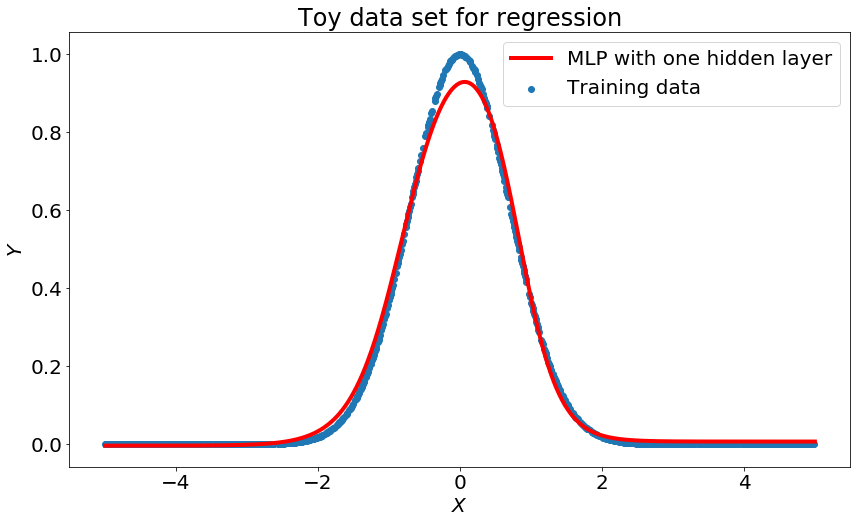

In [39]:
# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')
ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

Wow, that's pretty awful.  Does the neural network simply not work?  It's too early to conclude that.

### Exercise
Change the number of neurons in the layer, change the batch size, perhaps tweak the number of epochs.  You can even change the activation function if you'd like.  Can you get better results?  What worked the best?

### Solution

In [59]:
H = 16 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# fit the model
model_history = model.fit(X_train, Y_train,  batch_size=100, epochs=1000, verbose=1)

Epoch 1/1000
700/700 [==============================] - 6s 8ms/step - loss: 0.1263
Epoch 2/1000
700/700 [==============================] - 0s 63us/step - loss: 0.1206
Epoch 3/1000
700/700 [==============================] - 0s 43us/step - loss: 0.1163
Epoch 4/1000
700/700 [==============================] - 0s 34us/step - loss: 0.1122
Epoch 5/1000
700/700 [==============================] - 0s 104us/step - loss: 0.1081
Epoch 6/1000
700/700 [==============================] - 0s 119us/step - loss: 0.1043
Epoch 7/1000
700/700 [==============================] - 0s 88us/step - loss: 0.1009
Epoch 8/1000
700/700 [==============================] - 0s 69us/step - loss: 0.0979
Epoch 9/1000
700/700 [==============================] - 0s 157us/step - loss: 0.0956
Epoch 10/1000
700/700 [==============================] - 0s 61us/step - loss: 0.0940
Epoch 11/1000
700/700 [==============================] - 0s 40us/step - loss: 0.0933
Epoch 12/1000
700/700 [==============================] - 0s 40us/step - 

700/700 [==============================] - 0s 36us/step - loss: 0.0016
Epoch 192/1000
700/700 [==============================] - 0s 55us/step - loss: 0.0015
Epoch 193/1000
700/700 [==============================] - 0s 38us/step - loss: 0.0015
Epoch 194/1000
700/700 [==============================] - 0s 41us/step - loss: 0.0015
Epoch 195/1000
700/700 [==============================] - 0s 43us/step - loss: 0.0014
Epoch 196/1000
700/700 [==============================] - 0s 37us/step - loss: 0.0014
Epoch 197/1000
700/700 [==============================] - 0s 45us/step - loss: 0.0014
Epoch 198/1000
700/700 [==============================] - 0s 48us/step - loss: 0.0013
Epoch 199/1000
700/700 [==============================] - 0s 42us/step - loss: 0.0013
Epoch 200/1000
700/700 [==============================] - 0s 51us/step - loss: 0.0013
Epoch 201/1000
700/700 [==============================] - 0s 40us/step - loss: 0.0013
Epoch 202/1000
700/700 [==============================] - 0s 31us/ste

700/700 [==============================] - 0s 37us/step - loss: 1.5825e-04
Epoch 373/1000
700/700 [==============================] - 0s 42us/step - loss: 1.5739e-04
Epoch 374/1000
700/700 [==============================] - ETA: 0s - loss: 1.3844e-0 - 0s 29us/step - loss: 1.5663e-04
Epoch 375/1000
700/700 [==============================] - 0s 31us/step - loss: 1.5668e-04
Epoch 376/1000
700/700 [==============================] - 0s 31us/step - loss: 1.5543e-04
Epoch 377/1000
700/700 [==============================] - 0s 36us/step - loss: 1.5527e-04
Epoch 378/1000
700/700 [==============================] - 0s 36us/step - loss: 1.5450e-04
Epoch 379/1000
700/700 [==============================] - 0s 35us/step - loss: 1.5423e-04
Epoch 380/1000
700/700 [==============================] - 0s 41us/step - loss: 1.5294e-04
Epoch 381/1000
700/700 [==============================] - 0s 42us/step - loss: 1.5287e-04
Epoch 382/1000
700/700 [==============================] - 0s 38us/step - loss: 1.5225e-

700/700 [==============================] - 0s 39us/step - loss: 7.8305e-05
Epoch 553/1000
700/700 [==============================] - 0s 50us/step - loss: 7.8306e-05
Epoch 554/1000
700/700 [==============================] - 0s 46us/step - loss: 7.6723e-05
Epoch 555/1000
700/700 [==============================] - 0s 82us/step - loss: 7.6534e-05
Epoch 556/1000
700/700 [==============================] - 0s 60us/step - loss: 7.3694e-05
Epoch 557/1000
700/700 [==============================] - 0s 44us/step - loss: 7.2922e-05
Epoch 558/1000
700/700 [==============================] - 0s 45us/step - loss: 7.2656e-05
Epoch 559/1000
700/700 [==============================] - 0s 50us/step - loss: 7.3720e-05
Epoch 560/1000
700/700 [==============================] - 0s 39us/step - loss: 7.3167e-05
Epoch 561/1000
700/700 [==============================] - 0s 41us/step - loss: 7.2393e-05
Epoch 562/1000
700/700 [==============================] - 0s 39us/step - loss: 7.3426e-05
Epoch 563/1000
700/700 [=

700/700 [==============================] - 0s 64us/step - loss: 4.3250e-05
Epoch 733/1000
700/700 [==============================] - 0s 47us/step - loss: 4.3080e-05
Epoch 734/1000
700/700 [==============================] - 0s 28us/step - loss: 4.3225e-05
Epoch 735/1000
700/700 [==============================] - 0s 25us/step - loss: 4.2621e-05
Epoch 736/1000
700/700 [==============================] - 0s 33us/step - loss: 4.3658e-05
Epoch 737/1000
700/700 [==============================] - 0s 49us/step - loss: 4.3880e-05
Epoch 738/1000
700/700 [==============================] - 0s 44us/step - loss: 4.2415e-05
Epoch 739/1000
700/700 [==============================] - 0s 40us/step - loss: 4.3377e-05
Epoch 740/1000
700/700 [==============================] - 0s 45us/step - loss: 4.4833e-05
Epoch 741/1000
700/700 [==============================] - 0s 45us/step - loss: 4.3954e-05
Epoch 742/1000
700/700 [==============================] - 0s 49us/step - loss: 4.2392e-05
Epoch 743/1000
700/700 [=

700/700 [==============================] - 0s 48us/step - loss: 2.5299e-05
Epoch 913/1000
700/700 [==============================] - 0s 39us/step - loss: 2.6292e-05
Epoch 914/1000
700/700 [==============================] - 0s 25us/step - loss: 2.4667e-05
Epoch 915/1000
700/700 [==============================] - 0s 38us/step - loss: 2.4116e-05
Epoch 916/1000
700/700 [==============================] - 0s 49us/step - loss: 2.4734e-05
Epoch 917/1000
700/700 [==============================] - 0s 46us/step - loss: 2.4902e-05
Epoch 918/1000
700/700 [==============================] - 0s 46us/step - loss: 2.4279e-05
Epoch 919/1000
700/700 [==============================] - 0s 45us/step - loss: 2.4307e-05
Epoch 920/1000
700/700 [==============================] - 0s 67us/step - loss: 2.3760e-05
Epoch 921/1000
700/700 [==============================] - 0s 37us/step - loss: 2.3341e-05
Epoch 922/1000
700/700 [==============================] - 0s 44us/step - loss: 2.4076e-05
Epoch 923/1000
700/700 [=

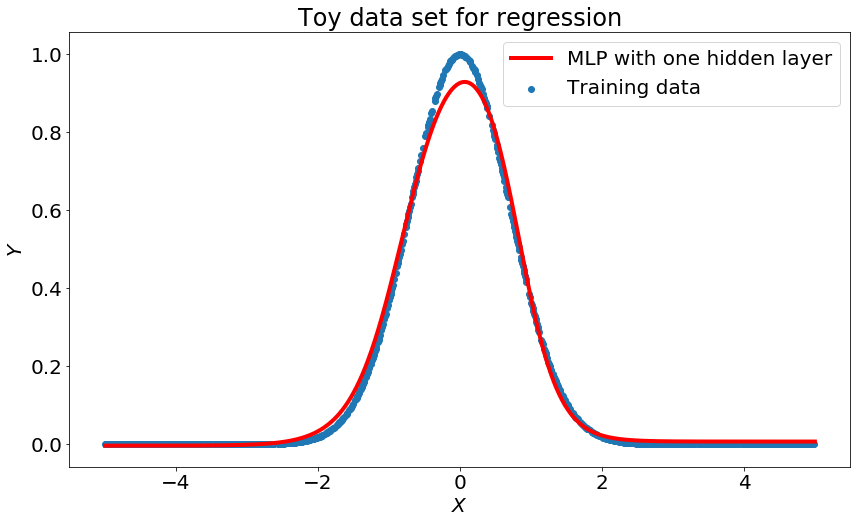

In [41]:
# use our model to predict in the range we want
X_range = np.linspace(-5, 5, 1000)
y_pred = model.predict(X_range)

fig, ax = plt.subplots(1, 1, figsize=(14,8))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with one hidden layer')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=1, fontsize=20)

plt.show()

### Exercise
Plot the loss function as a function of the epochs.

#### Hint
You can access the loss function values with the command:
```python
model_history.history['loss']
```

### Solution

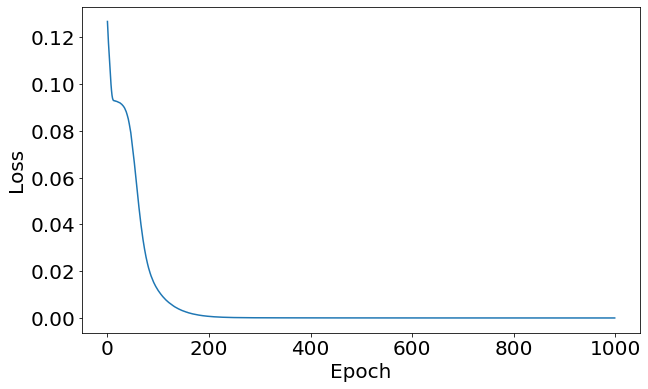

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(model_history.history['loss'])

ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.tick_params(labelsize=20)

How good is the model?  We can compute the $R^{2}$ score to get a sense of the model performance.

In [47]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
from sklearn.metrics import r2_score as r2

train_score = model.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', train_score)
print('Train R2:', r2(Y_train, model.predict(X_train)))

test_score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', test_score)
print('Test R2:', r2(Y_test, model.predict(X_test)))

700/700 [==============================] - 0s 146us/step
Train loss: 7.784284557731423e-05
Train R2: 0.9991657385986558
300/300 [==============================] - 0s 51us/step
Test loss: 6.844357994850725e-05
Test R2: 0.9992784491401135


### Exercise
Plot the train/test performace against the number of hidden nodes, H.

### Solution

In [48]:
input_dim = 1 # input dimension: just x
model = models.Sequential() # create sequential multi-layer perceptron

num_nodes = np.linspace(2.0, 32.0, 31)
train_score = np.zeros(len(num_nodes))
test_score = np.zeros(len(num_nodes))
R2_train = np.zeros(len(num_nodes))
R2_test = np.zeros(len(num_nodes))

for idx, H in enumerate(num_nodes):
    print("H = {0}".format(H))
    
    # layer 0, our hidden layer
    model.add(layers.Dense(int(H), input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='tanh')) 
    # layer 1
    model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit the model
    model_history = model.fit(X_train, Y_train, batch_size=100, epochs=400, verbose=0)
    
    train_score[idx] = model.evaluate(X_train, Y_train, verbose=1)
    test_score[idx] = model.evaluate(X_test, Y_test, verbose=1)
    
    R2_train[idx] = r2(Y_train, model.predict(X_train))
    R2_test[idx] = r2(Y_test, model.predict(X_test))

H = 2.0
300/300 [==============================] - 0s 39us/step
H = 3.0
300/300 [==============================] - 0s 39us/step
H = 4.0
300/300 [==============================] - 0s 36us/step
H = 5.0
300/300 [==============================] - 0s 38us/step
H = 6.0
300/300 [==============================] - 0s 53us/step
H = 7.0
300/300 [==============================] - 0s 136us/step
H = 8.0
300/300 [==============================] - 0s 41us/step
H = 9.0
300/300 [==============================] - 0s 141us/step
H = 10.0
300/300 [==============================] - 0s 57us/step
H = 11.0
300/300 [==============================] - 0s 58us/step
H = 12.0
300/300 [==============================] - 0s 86us/step
H = 13.0
300/300 [==============================] - 0s 74us/step
H = 14.0
300/300 [==============================] - 0s 66us/step
H = 15.0
300/300 [==============================] - 0s 83us/step
H = 16.0
300/300 [==============================] - 0s 35us/step
H = 17.0
300/300 [=============

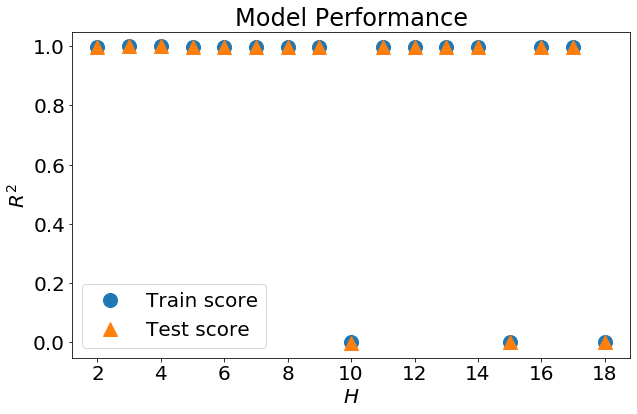

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.plot(num_nodes[:17], R2_train[:17], ls='', marker='o', ms=14, label='Train score')
ax.plot(num_nodes[:17], R2_test[:17], ls='', marker='^', ms=14, label='Test score')

ax.set_xlabel(r'$H$', fontsize=20)
ax.set_ylabel(r'$R^{2}$', fontsize=20)
ax.set_title('Model Performance', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=3, fontsize=20)

In [51]:
input_dim = 1 # input dimension: just x
model = models.Sequential() # create sequential multi-layer perceptron

num_nodes = [2, 4, 6, 8, 10]
train_score = np.zeros(len(num_nodes))
test_score = np.zeros(len(num_nodes))
R2_train = np.zeros(len(num_nodes))
R2_test = np.zeros(len(num_nodes))

for idx, n in enumerate(num_nodes):
    print("n = {0}".format(n))
    
    # layer 0, our hidden layer
    model.add(layers.Dense(int(H), input_dim=input_dim, 
                    kernel_initializer='normal', 
                    activation='tanh'))
    # layer 1
    model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

    # compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # fit the model
    model_history = model.fit(X_train, Y_train, batch_size=100, epochs=400, verbose=0)
    
    train_score[idx] = model.evaluate(X_train, Y_train, verbose=1)
    test_score[idx] = model.evaluate(X_test, Y_test, verbose=1)
    
    R2_train[idx] = r2(Y_train, model.predict(X_train))
    R2_test[idx] = r2(Y_test, model.predict(X_test))

H = 2
300/300 [==============================] - 0s 120us/step
H = 4
300/300 [==============================] - 0s 137us/step
H = 6
300/300 [==============================] - 0s 108us/step
H = 8
300/300 [==============================] - 0s 110us/step
H = 10
300/300 [==============================] - 0s 167us/step


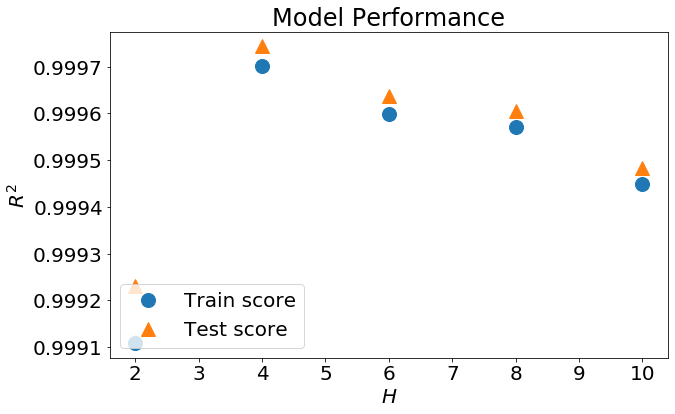

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

ax.plot(num_nodes[:17], R2_train[:17], ls='', marker='o', ms=14, label='Train score')
ax.plot(num_nodes[:17], R2_test[:17], ls='', marker='^', ms=14, label='Test score')

ax.set_xlabel(r'$H$', fontsize=20)
ax.set_ylabel(r'$R^{2}$', fontsize=20)
ax.set_title('Model Performance', fontsize=24)
ax.tick_params(labelsize=20)

ax.legend(loc=3, fontsize=20)

## Changing the Number of Layers

Now fix a width $H$ and let's fit a MLP network with **multiple** hidden layers, each with the same width. Start with logistic or hyperbolic-tan activation functions for the hidden nodes and linear activation for the output. 


***Experiment with the number of layers and observe the effect of this on the quality of the fit.***  You want to think about issues like computational effeciency and generalizability of this type of modeling. You want to compare the MLP to your polynomial model as well as to the model with a single hidden layer (in terms of quality of fit, efficiency and generalizability).

In [60]:
# number of hidden nodes
H = 4
# input dimension
input_dim = 1

# create sequential multi-layer perceptron
model2 = models.Sequential()
# layer 0
model2.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 1
model2.add(layers.Dense(H,
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 2
model2.add(layers.Dense(H,
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 3
model2.add(layers.Dense(H,  
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 4
model2.add(layers.Dense(H,  
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 5
model2.add(layers.Dense(H,  
                kernel_initializer='normal', 
                activation='tanh')) 
# layer 6
model2.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model2.compile(loss='mean_squared_error', optimizer='adam')

In [61]:
# fit the model
model2.fit(X_train, Y_train, batch_size=128, epochs=500, verbose=1)

Epoch 1/500
700/700 [==============================] - 5s 8ms/step - loss: 0.1257
Epoch 2/500
700/700 [==============================] - 0s 22us/step - loss: 0.1233
Epoch 3/500
700/700 [==============================] - 0s 23us/step - loss: 0.1207
Epoch 4/500
700/700 [==============================] - 0s 24us/step - loss: 0.1182
Epoch 5/500
700/700 [==============================] - 0s 23us/step - loss: 0.1156
Epoch 6/500
700/700 [==============================] - 0s 22us/step - loss: 0.1129
Epoch 7/500
700/700 [==============================] - 0s 23us/step - loss: 0.1101
Epoch 8/500
700/700 [==============================] - 0s 24us/step - loss: 0.1073
Epoch 9/500
700/700 [==============================] - 0s 22us/step - loss: 0.1045
Epoch 10/500
700/700 [==============================] - 0s 21us/step - loss: 0.1018
Epoch 11/500
700/700 [==============================] - 0s 22us/step - loss: 0.0993
Epoch 12/500
700/700 [==============================] - 0s 23us/step - loss: 0.0969
Ep

700/700 [==============================] - 0s 22us/step - loss: 0.0773
Epoch 194/500
700/700 [==============================] - 0s 22us/step - loss: 0.0773
Epoch 195/500
700/700 [==============================] - 0s 22us/step - loss: 0.0773
Epoch 196/500
700/700 [==============================] - 0s 22us/step - loss: 0.0773
Epoch 197/500
700/700 [==============================] - 0s 22us/step - loss: 0.0773
Epoch 198/500
700/700 [==============================] - 0s 22us/step - loss: 0.0772
Epoch 199/500
700/700 [==============================] - 0s 23us/step - loss: 0.0773
Epoch 200/500
700/700 [==============================] - 0s 23us/step - loss: 0.0773
Epoch 201/500
700/700 [==============================] - 0s 23us/step - loss: 0.0773
Epoch 202/500
700/700 [==============================] - 0s 23us/step - loss: 0.0773
Epoch 203/500
700/700 [==============================] - 0s 21us/step - loss: 0.0773
Epoch 204/500
700/700 [==============================] - 0s 53us/step - loss: 0

Epoch 289/500
700/700 [==============================] - 0s 32us/step - loss: 0.0772
Epoch 290/500
700/700 [==============================] - 0s 30us/step - loss: 0.0772
Epoch 291/500
700/700 [==============================] - 0s 21us/step - loss: 0.0773
Epoch 292/500
700/700 [==============================] - 0s 23us/step - loss: 0.0772
Epoch 293/500
700/700 [==============================] - 0s 21us/step - loss: 0.0773
Epoch 294/500
700/700 [==============================] - 0s 23us/step - loss: 0.0772
Epoch 295/500
700/700 [==============================] - 0s 22us/step - loss: 0.0772
Epoch 296/500
700/700 [==============================] - 0s 23us/step - loss: 0.0772
Epoch 297/500
700/700 [==============================] - 0s 26us/step - loss: 0.0773
Epoch 298/500
700/700 [==============================] - 0s 21us/step - loss: 0.0773
Epoch 299/500
700/700 [==============================] - 0s 21us/step - loss: 0.0773
Epoch 300/500
700/700 [==============================] - 0s 22us/

700/700 [==============================] - 0s 24us/step - loss: 0.0772
Epoch 386/500
700/700 [==============================] - 0s 23us/step - loss: 0.0772
Epoch 387/500
700/700 [==============================] - 0s 21us/step - loss: 0.0772
Epoch 388/500
700/700 [==============================] - 0s 21us/step - loss: 0.0773
Epoch 389/500
700/700 [==============================] - 0s 23us/step - loss: 0.0773
Epoch 390/500
700/700 [==============================] - 0s 21us/step - loss: 0.0773
Epoch 391/500
700/700 [==============================] - 0s 22us/step - loss: 0.0772
Epoch 392/500
700/700 [==============================] - 0s 23us/step - loss: 0.0773
Epoch 393/500
700/700 [==============================] - 0s 22us/step - loss: 0.0772
Epoch 394/500
700/700 [==============================] - 0s 22us/step - loss: 0.0773
Epoch 395/500
700/700 [==============================] - 0s 22us/step - loss: 0.0773
Epoch 396/500
700/700 [==============================] - 0s 23us/step - loss: 0

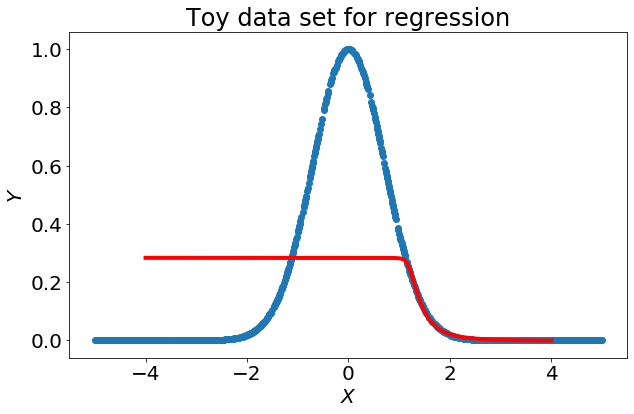

In [58]:
# use our model to predict in the range we want
X_range = np.linspace(-4, 4, 500)
y_pred = model2.predict(X_range)

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(X_train, Y_train, label='Training data')
ax.plot(X_range, y_pred, lw=4, color='r', label='MLP with 6 hidden layers')

ax.set_xlabel(r'$X$', fontsize=20)
ax.set_ylabel(r'$Y$', fontsize=20)
ax.set_title('Toy data set for regression', fontsize=24)
ax.tick_params(labelsize=20)

plt.show()

In [27]:
# evaluate the training and testing performance of your model 
# note: you should extract and check both the loss function and your evaluation metric
score = model2.evaluate(X_train, Y_train, verbose=1)
print('Train loss:', score)
print('Train R2:', r2(Y_train, model2.predict(X_train)))

Train loss: 3.729569390998222e-05
Train R2: 0.9996002926095076


In [28]:
score = model2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score)
print('Test R2:', r2(Y_test, model2.predict(X_test)))

300/300 [==============================] - 0s 308us/step
Test loss: 3.847057019205143e-05
Test R2: 0.9995944327276152


### Exercise
What if we wanted to approximate a different function $f$ with MLP's?  Consider the functions $f_{1}\left(x\right) = x\sin\left(x\right)$ and $f_{2}\left(x\right) = \left|x\right|$.  Can you create a network that can represent these functions?

***Experiment with approximating a few different non-linear functions with wide but shallow networks as well as deep but narrow networks.***

How expressive do you think MLP's are?

# Automatic Differentiation Demo
Lecture introduced automatic differentiation.  Here we will show a *very basic* implementation for the forward mode.

Suppose we want to compute the derivative of $f = x^{3}$.  This is a polynomial (actually a monomial) function and polynomials are *elementary* (or elemental) functions.

We'd like to evaluate $f^{\prime}$ at the point $a = 3$.  We can do this by hand in this simple example:
\begin{align}
  &f\left(3\right) = 27 \\
  &f^{\prime}\left(3\right) = 3 \left(3^{2}\right) = 27
\end{align}

Let's create a very simple `Python` datastructure to handle this case.

A list comes to mind.  The first index of the list will be the function value and the second index will be the derivative value.

In [62]:
f = [0, 0] # Initialize the list
a = 3.0 # The point we want to evaluate things at
f[0] = a**3.0
f[1] = 3.0 * a**2.0
print(f)

[27.0, 27.0]


That worked great!  The basic idea was that we can create a library of elementary functions and their derivatives.  Whenever `python` sees that elementary function, it automatically calculates the derivative as well.  This works very well in the forward mode.  Here's a slightly more advanced implementation.

In [63]:
class ForwardAD:
    def __init__(self, val, der=1.0):
        self.val = val
        self.der = der
    
    def __add__(self, other):
        try:
            return ForwardAD(self.val + other.val, self.der + other.der)
        except:
            return ForwardAD(self.val + other, self.der)
    
    def __radd__(self, other):
        return ForwardAD(self.val + other, self.der)
    
    def __mul__(self, other):
        try:
            return ForwardAD(self.val * other.val, self.val * other.der + self.der * other.val)
        except:
            return ForwardAD(self.val * other, self.der * other)
    
    def __rmul__(self, other):
        return ForwardAD(self.val * other, self.der * other)
    
    def __pow__(self, other):
        try:
            fa = self.val**other.val
            fpa = (other.val / self.val * self.der + np.log(self.val) * other.der) * fa
            return ForwardAD(fa, fpa)
        except:
            fa = self.val**other
            fpa = other * self.val**(other - 1.0) * self.der
            return ForwardAD(fa, fpa)
    
    def __rpow__(self, other):
        fa = self.val**other
        fpa = fa * np.log(other) * self.der
        return ForwardAD(fa, fpa)        

In [ ]:
x = ForwardAD(3.0)
y = x**3.0 + 2.0 * x**2.0 + 3.0
print(y.val, y.der)